# Solución numérica a la ecuación de Lane Emden

Queremos encontrar una solución numérica a la ecuación diferencial de Lane Endem, la cual tiene la forma
    \begin{equation}
    \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)=-\theta^n.
    \end{equation}
Para ello vamos a utilizar un método de integración clásica tipo Riemann. Con lo cual serán necesarias dos integraciones sucesivas, para facilitar la notación utilizaremos la una función auxiliar, la cual llamaremos $F(\xi,\theta)=\xi^2\frac{d\theta}{d\xi}$, con lo cual segun la ecuación de Lane-Emden podemos decir que
    \begin{equation}
    \frac{dF(\xi,\theta)}{d\xi}=-\xi^2\theta^n.
    \end{equation}
Así podemos obtener $\theta$ despejando e integrando la expresión anterior, obteniendo
    \begin{equation}
    \theta = \int\frac{F(\xi,\theta)}{\xi^2}d\xi.
    \end{equation}
Para su solución numérica comenzamos importando la libreria para graficar la solución:

In [10]:
import matplotlib.pyplot as plt
plt.style.use("bmh")

Ahora, para cada valor de $n$ (coeficiente politrópico) llevamos a cabo la integración, sumando iterativamente en $F$, $\theta$ y $\xi$.

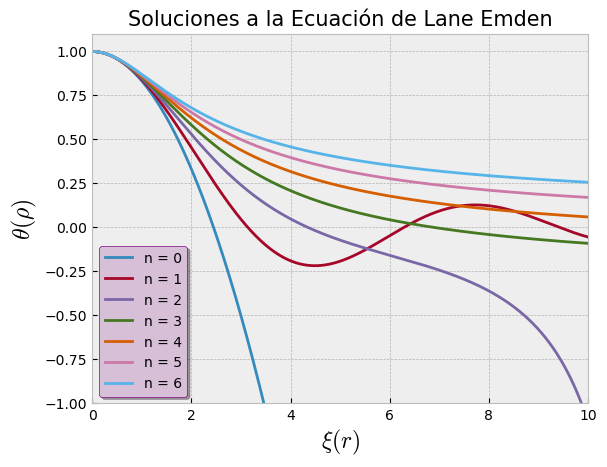

In [29]:
# definimos el diferencial y el numero de "divisiones" en la integración

dxi = 0.001
N = 10000

# Iteramos para cada valor de "n"

for n in range(7):
    
# Definimos las condiciones de borde, además de crear el arreglo de las soluciones para theta y xi.   
    
    theta = 1  # Primera condicion de Borde
    F = 0.0    # Segunda condición de borde
    xi = 0.001 # Comenzamos en un valor cercano a cero para que esto no interfiera en la división
    
    res_theta = []
    res_xi = []
    
# Para cada "n" vamos sumando de forma iterativa sobre las variables ya definidas y vamos agregando los valores a los resultados.
    
    for i in range(N):
        F += -xi**2*theta**n*dxi
        theta += F/xi**2*dxi
        xi += dxi
        res_theta.append(theta)
        res_xi.append(xi)
        
# Graficamos para cada "n"
        
    plt.plot(res_xi,res_theta,label="n = "+repr(n))

# Añadimos detalles estéticos al gráfico  
    
plt.xlim(0,10)
plt.ylim(-1,1.1)
plt.legend(fancybox=True,framealpha=1,shadow=True,facecolor="thistle",edgecolor="purple")
plt.xlabel("$\\xi(r)$",fontsize=17)
plt.ylabel("$\\theta(\\rho)$",fontsize=17)
plt.title("Soluciones a la Ecuación de Lane Emden",fontsize=15)
plt.savefig("fig-sol-ec-lane-emdem.pdf")
plt.show()